# Introduction

Descriptive Analytics is one of the core components of any analysis life-cycle pertaining to a data science project or even specific research. Data aggregation, summarization and visualization are some of the main pillars supporting this area of data analysis. Since the days of traditional Business Intelligence to even in this age of Artificial Intelligence, Data Visualization has been a powerful tool and has been widely adopted by organizations owing to its effectiveness in abstracting out the right information, understanding and interpreting results clearly and easily. However, dealing with multi-dimensional datasets with typically more than two attributes start causing problems, since our medium of data analysis and communication is typically restricted to two dimensions. In this article, we will explore some effective strategies of visualizing data in multiple dimensions (ranging from 1-D up to 6-D).

# Motivation

> *“A picture is worth a thousand words”*

This is a very popular English idiom we are all familiar with and should serve as enough inspiration and motivation for us to understand and leverage data visualization as as effective tool in our analysis. Always remember that “Effective data visualization is both an art as well as a science”. Before we begin, I would also like to mention the following quote which is really relevant and reinforces the necessity of data visualization.

> *“The greatest value of a picture is when it forces us to notice what we never expected to see.”
— John Tukey*

# A quick refresher on visualization
I am assuming the average reader knows about the essential graphs and charts which are used for plotting and visualizing data hence I will not go into detailed explanations but we will be covering most of them during our hands-on experiments here. Data visualization should be leveraged on top of data to communicate patterns and insights with *‘clarity, precision and efficiency’* as mentioned by notable visualization pioneer and statistician, Edward Tufte.

Structured data typically consists of data observations represented by rows and features or data attributes represented by columns. Each column can also be called as a specific dimension of the dataset. Most common data types include continuous, numeric data and discrete, categorical data. Hence any data visualization will basically depict one or more data attributes in an easy to understand visual like a scatter plot, histogram, box-plot and so on. I will cover both ***univariate*** (one-dimension) and ***multivariate*** (multi-dimensional) data visualization strategies. We will be using the Python machine learning eco-system here and we recommend you to check out frameworks for data analysis and visualization including __pandas__, __matplotlib__, __seaborn__, __plotly__ and __bokeh__. Besides this, knowing about __D3.js__ is also a must if you are interested in crafting beautiful and meaningful visualizations with data. Interested readers are recommended to read ***‘ The Visual Display of Quantitative Information’*** by Edward Tufte.

<br>
<br>
<br>
Let’s get cracking instead of me droning on about theory and concepts. We will use the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) available from the UCI Machine Learning Repository. This data actually consists of two datasets depicting various attributes of red and white variants of the Portuguese “Vinho Verde” wine. All the analyses in this article is available in my [GitHub repository](https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/bonus%20content/effective%20data%20visualization) as a Jupyter Notebook for those of you itching to try it out yourself!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

We will mainly be using **matplotlib** and **seaborn** as our visualization frameworks here but you are free to check out and try the same with any other framework of your choice. Let’s take a look at the data after some basic data pre-processing steps.

In [4]:
path = "D:/Program/dataset/Wine Quality Data Set/"

white_wine = pd.read_csv(path+'winequality-white.csv', sep=';')
red_wine = pd.read_csv(path+'winequality-red.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

We create a single data frame wines by merging both the datasets pertaining to red and white wine samples. We also create a new categorical variable __quality_label__ based on the __quality__ attribute of wine samples. Let’s take a peek at the data now.

In [13]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


It is quite evident that we have several numeric and categorical attributes for wine samples. Each observation belongs to a red or white wine sample and the attributes are specific attributes or properties measured and obtained from physicochemical tests. You can check out the Jupyter notebook if you want to understand the detailed explanation of each attribute but the names are pretty self-explanatory. Let’s do a quick basic descriptive summary statistics on some of these attributes of interest.

In [14]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']

rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [16]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

It’s quite easy to contrast and compare these statistical measures for the different types of wine samples. Notice the stark difference in some of the attributes. We will emphasize those in some of our visualizations later on.

# Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension).

## Visualizing data in One Dimension (1-D)
One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage ***histograms*** using **pandas**



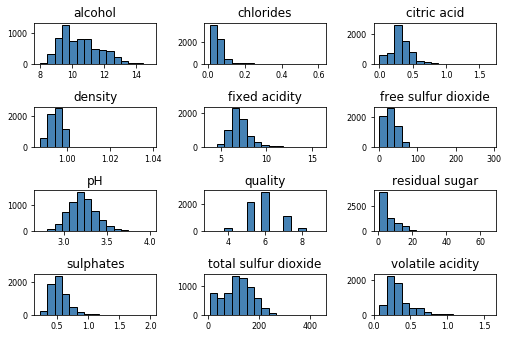

In [17]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

The plots above give a good idea about the basic data distribution of any of the attributes.

Let’s drill down to visualizing one of the continuous, numeric attributes. Essentially a histogram or a density plot works quite well in understanding how the data is distributed for that attribute.

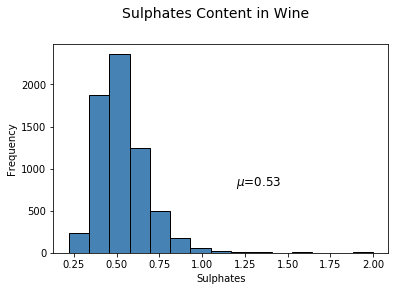

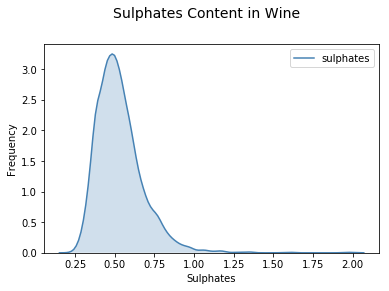

In [15]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

It is quite evident from the above plot that there is a definite right skew in the distribution for wine **sulphates** .

***Visualizing a discrete, categorical data attribute*** is slightly different and ***bar plots*** are one of the most effective ways to do the same. You can use ***pie-charts*** also but in general try avoiding them altogether, especially when the number of distinct categories is more than three.

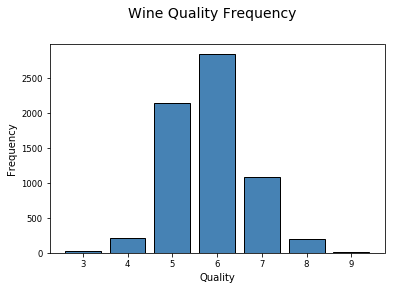

In [20]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

# Multivariate Analysis
Multivariate analysis is where the fun as well as the complexity begins. Here we analyze multiple data dimensions or attributes (2 or more). Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes. You can also leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand to check out statistical significance for different attributes, groups and so on.

## Visualizing data in Two Dimensions (2-D)
One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a ***pair-wise correlation matrix*** and depict it as a ***heatmap***.



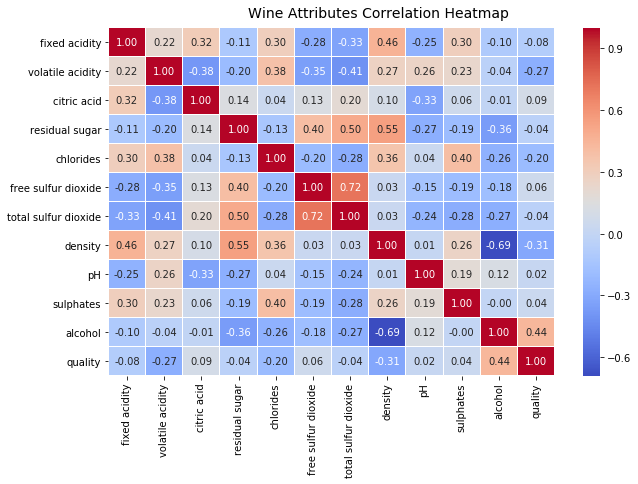

In [24]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use ***pair-wise scatter plots*** amongst attributes of interest.

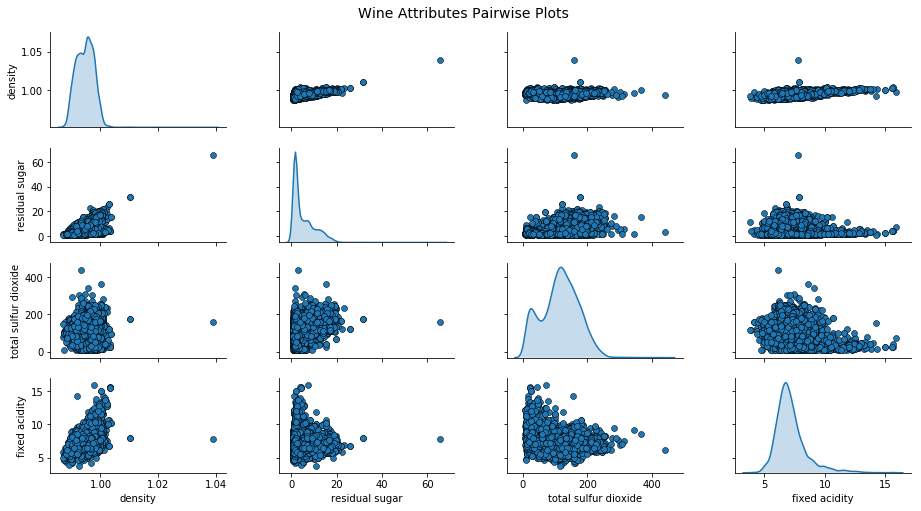

In [25]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Based on the above plot, you can see that scatter plots are also a decent way of observing potential relationships or patterns in two-dimensions for data attributes. Another way of visualizing multivariate data for multiple attributes together is to use ***parallel coordinates***.

In [27]:
# Scaling attribute values to avoid few outiers
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.166089,white
1,0.301278,-0.681719,0.305311,0.373895,red
2,-0.859324,0.411306,0.305311,-0.320370,white
3,0.408001,1.210056,1.189993,-0.706073,white
4,1.395180,1.777588,2.003900,0.142473,white


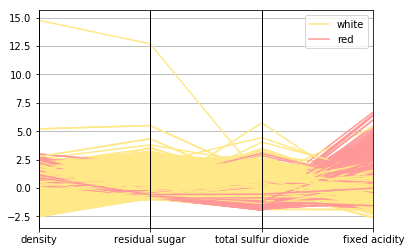

In [28]:
# plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type', color=('#FFE888', '#FF9999'))

Basically, in this visualization as depicted above, points are represented as connected line segments. Each vertical line represents one data attribute. One complete set of connected line segments across all the attributes represents one data point. Hence points that tend to cluster will appear closer together. Just by looking at it, we can clearly see that ***density*** is slightly more for red wines as compared to white wines. Also ***residual sugar*** and ***total sulfur dioxide*** is higher for white wines as compared to red and ***fixed acidity*** is higher for red wines as compared to white wines. Check out the statistics from the statistic table we derived earlier to validate this assumption!

Let’s look at some ways in which we can ***visualize two continuous, numeric attributes. Scatter plots*** and ***joint plots*** in particular are good ways to not only check for patterns, relationships but also see the individual distributions for the attributes.

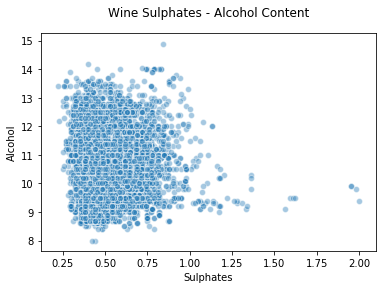

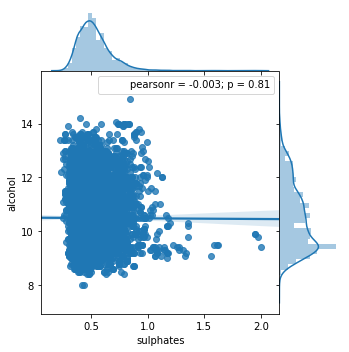

In [29]:
# Scatter Plot
plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

The ***scatter plot*** is depicted on the left side and the ***joint plot*** on the right in the above figure. Like we mentioned, you can check out correlations, relationships as well as individual distributions in the joint plot.

How about ***visualizing two discrete, categorical attributes?*** One way is to leverage separate plots (subplots) or ***facets*** for one of the categorical dimensions.

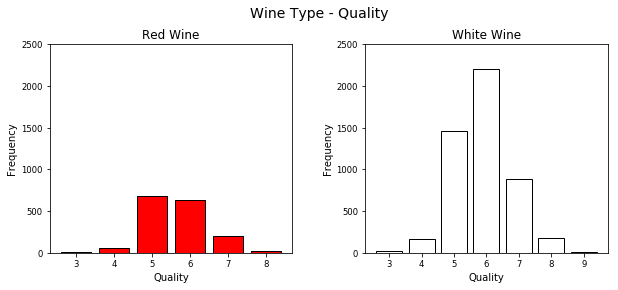

In [30]:
# Using subplots or facets along with Bar Plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
# red wine - wine quality
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

# white wine - wine quality
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

While this is a good way to visualize categorical data, as you can see, leveraging **matplotlib** has resulted in writing a lot of code. Another good way is to use ***stacked bars*** or ***multiple bars*** for the different attributes in a single plot. We can leverage **seaborn** for the same easily.

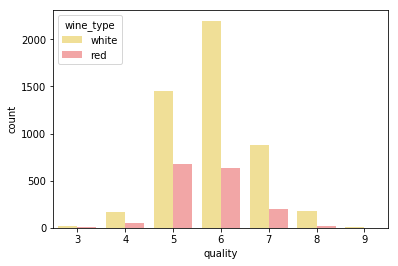

In [31]:
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

This definitely looks cleaner and you can also effectively compare the different categories easily from this single plot.

Let’s look at ***visualizing mixed attributes in two-dimensions*** (essentially numeric and categorical together). One way is to use ***faceting\subplots*** along with generic ***histograms*** or ***density plots.***

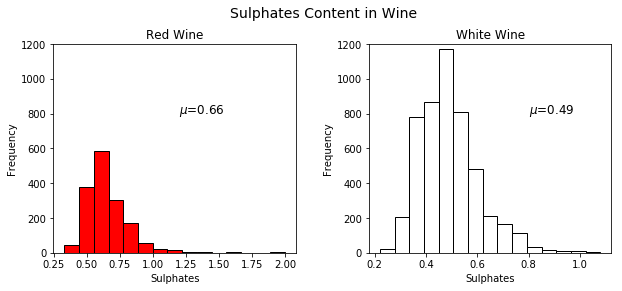

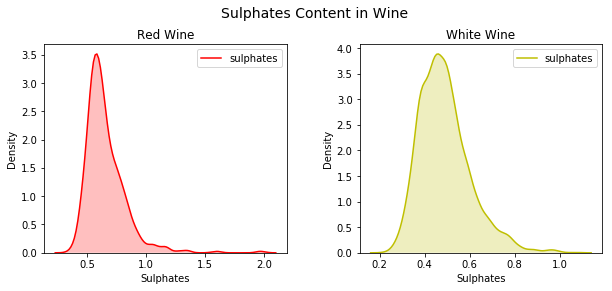

In [32]:
# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)


# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

While this is good, once again we have a lot of boilerplate code which we can avoid by leveraging **seaborn** and even depict the plots in one single chart.

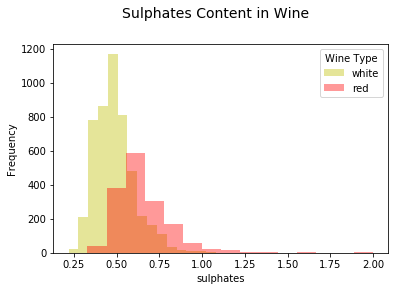

In [33]:
# Using multiple Histograms 
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

You can see the plot generated above is clear and concise and we can easily compare across the distributions easily. Besides this, ***box plots*** are another way of effectively depicting groups of numeric data based on the different values in the categorical attribute. ***Box plots*** are a good way to know the quartile values in the data and also potential outliers.

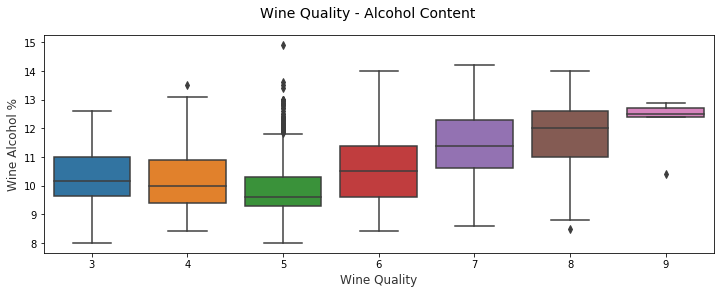

In [34]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

Another similar visualization is ***violin plots***, which are another effective way to visualize grouped numeric data using kernel density plots (depicts probability density of the data at different values).

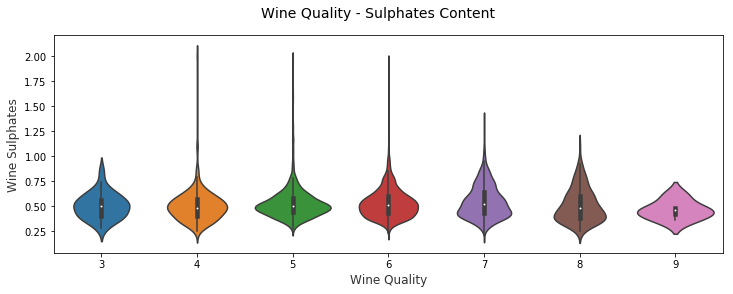

In [35]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

You can clearly see the density plots above for the different wine **quality** categories for wine **sulphate** .

> Visualizing data till two-dimensions is pretty straightforward but starts becoming complex as the number of dimensions (attributes) start increasing. The reason is because we are bound by the two-dimensions of our display mediums and our environment.

> For three-dimensional data, we can introduce a fake notion of **depth** by taking a z-axis in our chart or leveraging subplots and facets.

> However for data higher than three-dimensions, it becomes even more difficult to visualize the same. The best way to go higher than three dimensions is to use **plot facets, color, shapes, sizes, depth** and so on. You can also use **time** as a dimension by making an animated plot for other attributes over time (considering time is a dimension in the data). Check out [**Hans Roslin’s excellent talk**](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen) to get an idea of the same!

## Visualizing data in Three Dimensions (3-D)
Considering three attributes or dimensions in the data, we can visualize them by considering a ***pair-wise scatter plot*** and introducing the notion of color or ***hue*** to separate out values in a categorical dimension.

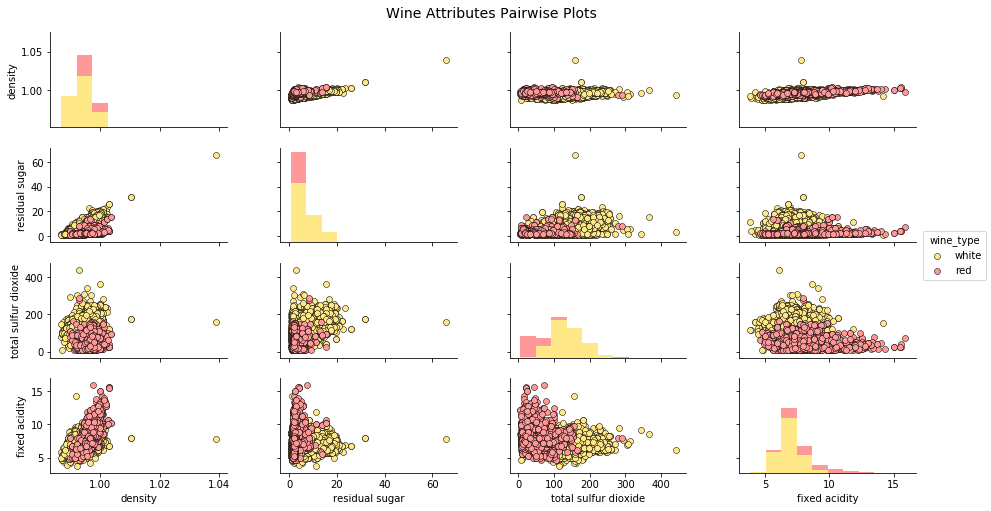

In [36]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

The above plot enables you to check out correlations and patterns and also compare around wine groups. Like we can clearly see ***total sulfur dioxide*** and ***residual sugar*** is higher for white wine as compared to red.

Let’s look at strategies for ***visualizing three continuous, numeric attributes***. One way would be to have two dimensions represented as the regular ***length*** (x-axis)and ***breadth*** (y-axis) and also take the notion of ***depth*** (z-axis) for the third dimension.

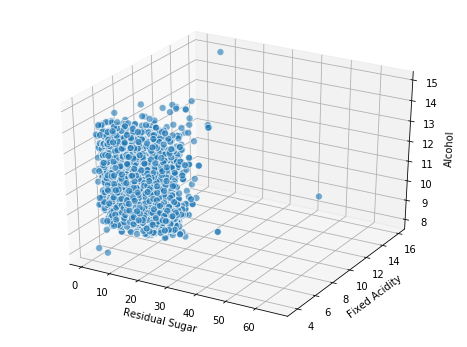

In [37]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

We can also still leverage the regular 2-D axes and introduce the notion of ***size*** as the third dimension (essentially a ***bubble chart***) where the size of the dots indicate the quantity of the third dimension.

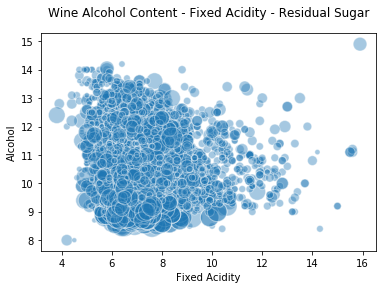

In [38]:
# Visualizing 3-D numeric data with a bubble chart
# length, breadth and size
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)

Thus you can see how the chart above is not a conventional scatter plot but more of a bubble chart with varying point sizes (bubbles) based on the quantity of ***residual sugar*** . Of course its not always that you will find definite patterns in the data like in this case, we see varying sizes across the other two dimensions.

For ***visualizing three discrete, categorical attributes***, while we can use the conventional ***bar plots***, we can leverage the notion of ***hue*** as well as ***facets*** or ***subplots*** to support the additional third dimension. The **seaborn** framework helps us keep the code to a minimum and plot this effectively.



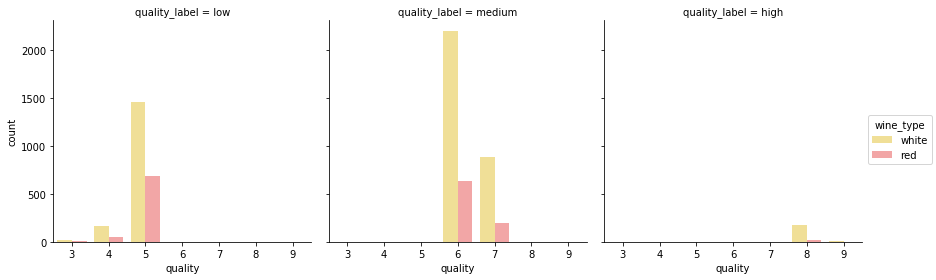

In [39]:
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

The chart above clearly shows the frequency pertaining to each of the dimensions and you can see how easy and effective this can be in understanding relevant insights.

Considering visualization for ***three mixed attributes***, we can use the notion of ***hue*** for separating our groups in one of the categorical attributes while using conventional visualizations like ***scatter plots*** for visualizing two dimensions for numeric attributes.

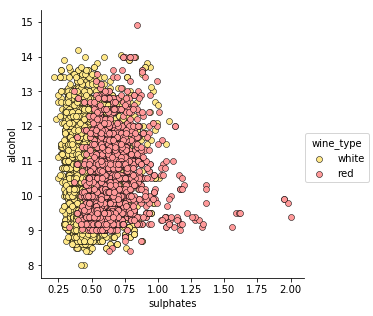

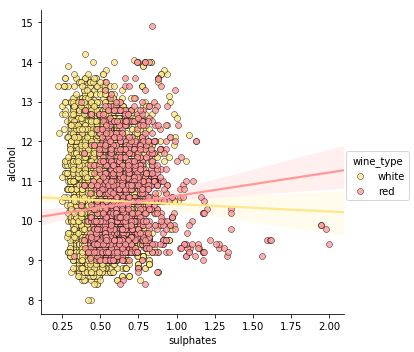

In [40]:
# Visualizing 3-D mix data using scatter plots
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))
                  
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))  

Thus hue acts as a good separator for the categories or groups and while there is no or very weak correlation as observed above, we can still understand from these plots that **sulphates** are slightly higher for red wines as compared to white. Instead of a scatter plot, you can also use a ***kernel density plot*** to understand the data in three dimensions.



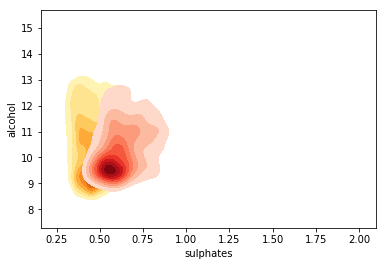

In [41]:
# Visualizing 3-D mix data using kernel density plots
# leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)

It is quite evident and expected that red wine samples have higher sulphate levels as compared to white wines. You can also see the density concentrations based on the hue intensity.

In case we are dealing with ***more than one categorical attribute*** in the three dimensions, we can use ***hue*** and ***one of the regular axes*** for visualizing data and use visualizations like ***box plots*** or ***violin plots*** to visualize the different groups of data.

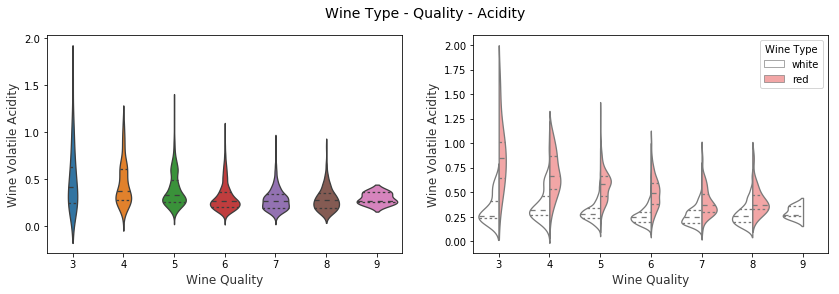

In [42]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

In the figure above, we can see that in the 3-D visualization on the right hand plot, we have represented wine quality on the x-axis and wine_type as the hue. We can clearly see some interesting insights like volatile acidity is higher for red wines as compared to white wines.

You can also consider using ***box plots*** for representing mixed attributes with more than one categorical variable in a similar way.

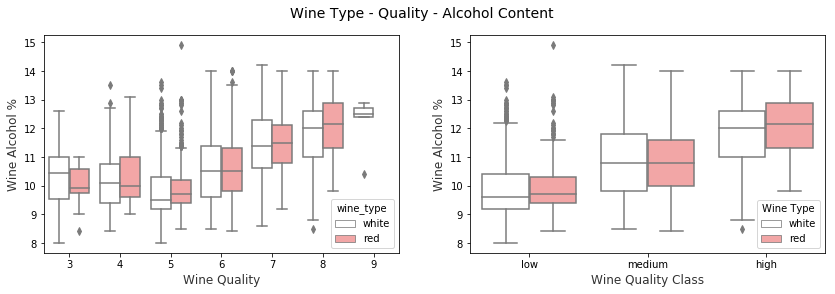

In [43]:
# Visualizing 3-D mix data using box plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

We can see that both for quality and quality_label attributes, the wine alcohol content increases with better quality. Also red wines tend to have a sightly higher median alcohol content as compared to white wines based on the ***quality class***. However if we check the ***quality ratings***, we can see that for lower rated wines (***3 & 4***), the white wine median alcohol content is greater than red wine samples. Otherwise red wines seem to have a slightly higher median alcohol content in general as compared to white wines.

## Visualizing data in Four Dimensions (4-D)
Based on our discussion earlier, we leverage various components of the charts visualize multiple dimensions. One way to visualize data in four dimensions is to use ***depth*** and ***hue*** as specific data dimensions in a conventional plot like a ***scatter plot***.

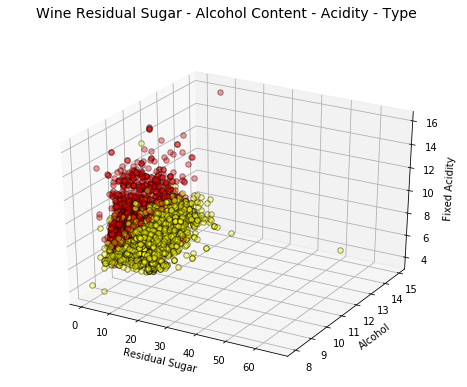

In [44]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

The wine_type attribute is denoted by the hue which is quite evident from the above plot. Also, while interpreting these visualizations start getting difficult due to the complex nature of the plots, you can still gather insights like fixed acidity is higher for red wines and residual sugar is higher for white wines. Of course if there were some association between alcohol and fixed acidity we might have seen a gradually increasing or decreasing plane of data points showing some trend.

Another strategy is to keep a 2-D plot but use hue and data point size as data dimensions. Typically this would be a ***bubble chart*** similar to what we visualized earlier.

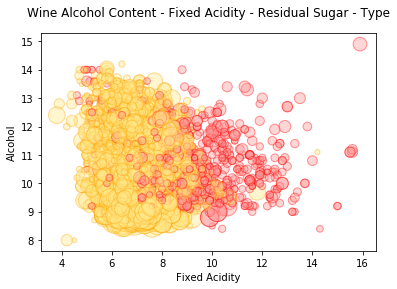

In [45]:
# Visualizing 4-D mix data using bubble plots
# leveraging the concepts of hue and size
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

We use hue to represent wine_type and the data point size to represent residual sugar. We do see similar patterns from what we observed in the previous chart and bubble sizes are larger for white wine in general indicate residual sugar values are higher for white wine as compared to red.

If we have more that two categorical attributes to represent, we can reuse our concept of leveraging hue and facets to depict these attributes and regular plots like ***scatter plots*** to represent the numeric attributes. Let’s look at a couple of examples.

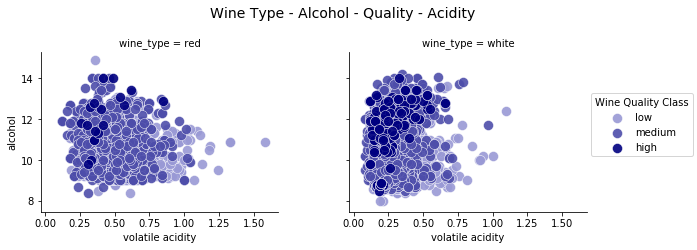

In [46]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

The effectiveness of this visualization is verified by the fact we can easily spot multiple patterns. The volatile acidity levels for white wines are lower and also high quality wines have lower acidity levels. Also based on white wine samples, high quality wines have higher levels of alcohol and low quality wines have the lowest levels of alcohol!

Let’s take up a similar example with some other attributes and build a visualization in four dimensions.

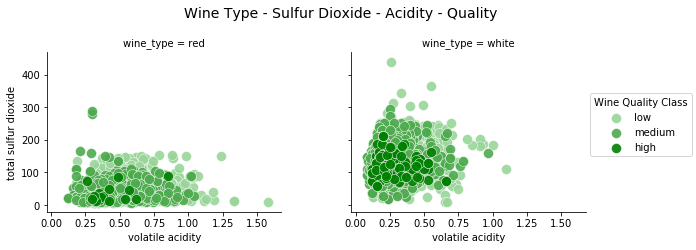

In [47]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

We clearly see that high quality wines have lower content of total sulfur dioxide which is quite relevant if you also have the necessary domain knowledge about wine composition. We also see thattotal sulfur dioxide levels for red wine are lower than white wine. The volatile acidity levels are however higher for red wines in several data points.

## Visualizing data in Five Dimensions (5-D)
Once again following a similar strategy as we followed in the previous section, to visualize data in five dimensions, we leverage various plotting components. Let’s use ***depth, hue and size*** to represent three of the data dimensions besides ***regular axes*** representing the other two dimensions. Since we use the notion of size, we will be basically plotting a three dimensional ***bubble chart***.

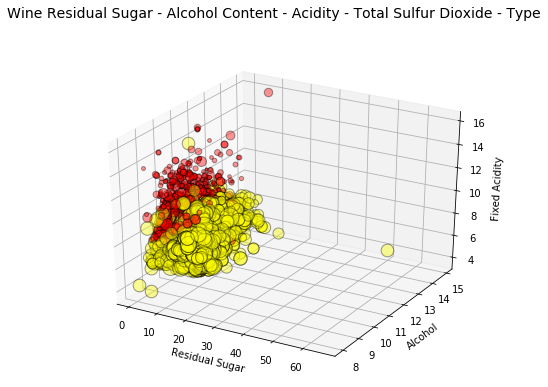

In [48]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

This chart depicts the same patterns and insights that we talked about in the previous section. However, we can also see that based on the point sizes which are represented by total sulfur dioxide, white wines have higher total sulfur dioxide levels as compared to red wines.

Instead of depth, we can also use facets along with hue to represent more than one categorical attribute in these five data dimensions. One of the attributes representing size can be numerical (continuous) or even categorical (but we might need to represent it with numbers for data point sizes). While we don’t depict that here due to the lack of categorical attributes, feel free to try it out on your own datasets.

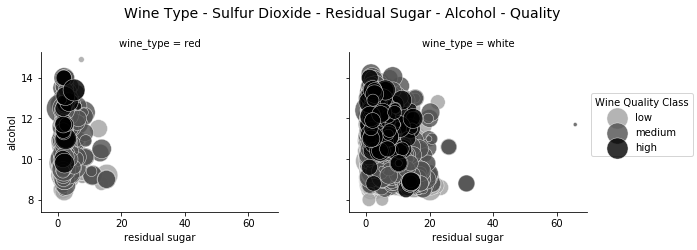

In [49]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and facets
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

This is basically an alternative approach to visualizing the same plot which we plotted previously for five dimensions. While the additional dimension of depth might confuse many when looking at the plot we plotted previously, this plot due to the advantage of facets, still remains effectively on the 2-D plane and hence is often more effective and easy to interpret.

We can already see that it’s becoming complex handling so many data dimensions! If some of you are thinking, why not add more dimensions? Let’s go ahead and give it a shot!

## Visualizing data in Six Dimensions (6-D)
Now that we are having fun (I hope!), let’s add another data dimension in our visualizations. We will leverage depth, hue, size and shape besides our ***regular two axes*** to depict all the six data dimensions.

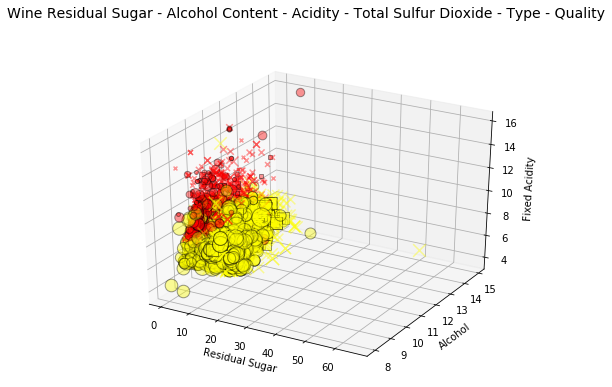

In [50]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, size, depth and shape
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Wow that is six dimensions in one plot! We have wine quality_label depicted by shapes, high (the squared pixel), medium (the X marks) and low (the circles) quality wines. The wine_type is represented by hue, fixed acidity by the depth and data point size represents total sulfur dioxide content.

Interpreting this might seem a bit taxing but consider a couple of components at a time when trying to understand what’s going on.

1. Considering shape & y-axis, we have high and medium quality wines having higher alcohol levels as compared to low quality wines.
2. Considering hue and size, we have higher content of total sulfur dioxide for white wines as compared to red wines.
3. Considering depth and hue, we have white wines having lower fixed acidity levels as compared to red wines.
4. Considering hue and x-axis, we have red wines having lower levels of residual sugar as compared to white wines.
5. Considering hue and shape, white wines seem to have more high quality wines as compared to red wines (possibly due to larger sample size of white wines).

We can also build a 6-D visualization by removing the depth component and use facets instead for a categorical attribute.

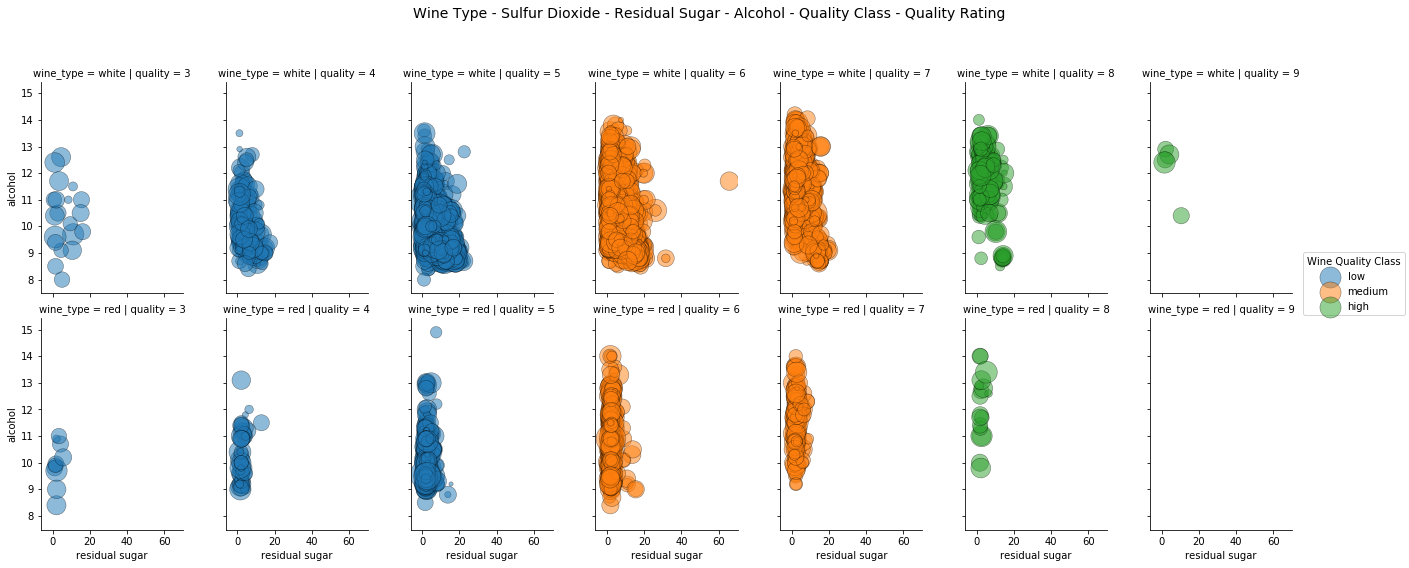

In [51]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, facets and size
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Thus in this scenario, we leverage facets and hue to represent three categorical attributes and the ***two regular axes*** and size to represent three numerical attributes for our 6-D data visualization.

# Conclusion
Data visualization is an art as well as a science. If you’re reading this, I really commend your efforts in going through this extensive article. The intent is not to memorize anything nor to give a fixed set of rules for visualizing data. The main objective here is to understand and learn some effective strategies for visualizing data especially when the number of dimensions start to increase. I encourage you to leverage these snippets for visualizing your own datasets in the future. Feel free to leave your feedback in the comments and do share your own strategies of effective data visualization “especially if you can go higher!”

# Reference
* [The Art of Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57)
* [Effective Multi-dimensional Data Visualization](https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/effective%20data%20visualization/Bonus%20-%20Effective%20Multi-dimensional%20Data%20Visualization.ipynb)

Thanks!